# Theoretical Questions

#1. What is unsupervised learning in the context of machine learning?
-> Unsupervised learning is a type of machine learning where the model is trained on data without labeled outcomes. The goal is to discover hidden patterns or groupings in the data, such as customer segmentation or anomaly detection, without prior knowledge of output labels.

#2. How does K-Means clustering algorithm work?
-> K-Means partitions data into K distinct clusters by minimizing the variance within each cluster. It initializes K centroids, assigns each data point to the nearest centroid, and then recalculates the centroids based on the current assignments. This process repeats until convergence.

#3. Explain the concept of a dendrogram in hierarchical clustering.
-> A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It visually represents the nested grouping of data points and the level of similarity at which clusters are merged.

#4. What is the main difference between K-Means and Hierarchical Clustering?
-> K-Means is a flat clustering algorithm that requires a predefined number of clusters, while Hierarchical Clustering builds a tree of clusters without needing a preset cluster number. Hierarchical clustering is also deterministic, whereas K-Means may produce different results due to random initialization.

#5. What are the advantages of DBSCAN over K-Means?
-> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not require specifying the number of clusters in advance, can find clusters of arbitrary shapes, and is effective at identifying outliers, unlike K-Means which assumes spherical clusters and is sensitive to noise.

#6. When would you use Silhouette Score in clustering?
-> The Silhouette Score is used to evaluate how well data points fit within their clusters. It is helpful when comparing the quality of different clustering algorithms or determining the optimal number of clusters by measuring cohesion and separation.

#7. What are the limitations of Hierarchical Clustering?
-> Hierarchical clustering has high time and space complexity, making it inefficient for large datasets. Once a merge or split is made, it cannot be undone (no backtracking), and it’s also sensitive to noise and outliers.

#8. Why is feature scaling important in clustering algorithms like K-Means?
-> K-Means relies on distance calculations (typically Euclidean distance). If features have different scales, those with larger ranges can dominate the clustering process, leading to biased results. Feature scaling standardizes the contribution of each feature.

#9. How does DBSCAN identify noise points?
-> DBSCAN classifies data points that do not belong to any cluster (i.e., not within the radius of sufficient neighboring points) as noise or outliers. These points are not dense enough to be part of a cluster.

#10. Define inertia in the context of K-Means.
-> Inertia refers to the sum of squared distances between each point and its assigned cluster centroid. Lower inertia means tighter clusters, but extremely low values may indicate overfitting.

#11. What is the elbow method in K-Means clustering?
-> The elbow method is used to determine the optimal number of clusters (K) by plotting inertia against K. The point where the rate of decrease sharply changes (forming an "elbow") suggests a suitable number of clusters.

#12. Describe the concept of “density” in DBSCAN.
-> Density in DBSCAN refers to how closely packed data points are in a region. A region is considered dense if it contains a minimum number of points (MinPts) within a specified distance (epsilon).

#13. Can hierarchical clustering be used on categorical data?
->Yes, with appropriate distance metrics like Hamming distance or using algorithms like Agglomerative Clustering with categorical-friendly linkage functions, hierarchical clustering can be applied to categorical data.

#14. What does a negative Silhouette Score indicate?
-> A negative Silhouette Score indicates that a data point is likely assigned to the wrong cluster, as it is closer on average to a neighboring cluster than to the one it is assigned to.

#15. Explain the term “linkage criteria” in hierarchical clustering.
-> Linkage criteria determine how the distance between two clusters is calculated. Common types include single linkage (minimum distance), complete linkage (maximum distance), and average linkage (mean distance between points in clusters).

#16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
-> K-Means assumes clusters are of similar size and density. In data with uneven cluster shapes or densities, K-Means may split larger clusters or merge smaller, dense clusters, leading to incorrect groupings.

#17. What are the core parameters in DBSCAN, and how do they influence clustering?
->DBSCAN uses two parameters: epsilon (maximum distance between points to be considered neighbors) and MinPts (minimum number of points to form a dense region). These parameters control the formation and granularity of clusters.

#18. How does K-Means++ improve upon standard K-Means initialization?
-> K-Means++ enhances the initialization by choosing initial centroids that are far apart, reducing the chance of poor clustering and speeding up convergence, compared to random centroid selection in standard K-Means.

#19. What is agglomerative clustering?
->Agglomerative clustering is a type of hierarchical clustering that starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until one cluster or a desired number is reached.

#20. What makes Silhouette Score a better metric than just inertia for model evaluation?
->Silhouette Score considers both cohesion (how close points are within a cluster) and separation (how far they are from other clusters), providing a more holistic evaluation. Inertia only measures compactness and ignores inter-cluster separation.



# Practical Questions

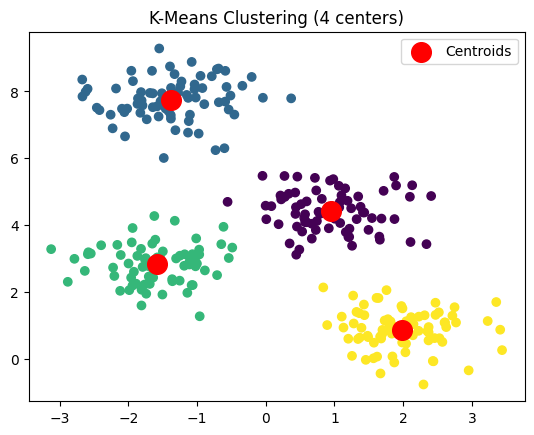

In [1]:
# Practical Question 21
# Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering (4 centers)")
plt.legend()
plt.show()


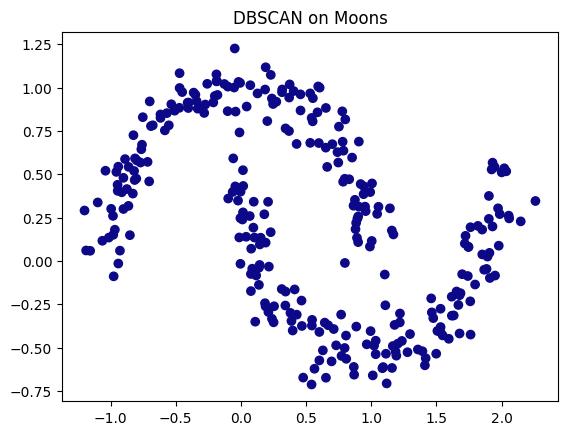

In [2]:
# Practical Question 22
# Create synthetic data using make_moons and apply DBSCAN. Visualize clusters and noise points.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=0)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on Moons")
plt.show()


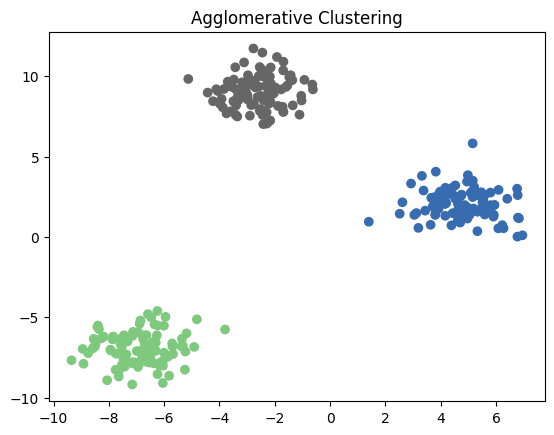

In [3]:
# Practical Question 23
# Apply Agglomerative Clustering on synthetic data with 3 centers using make_blobs.
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering")
plt.show()


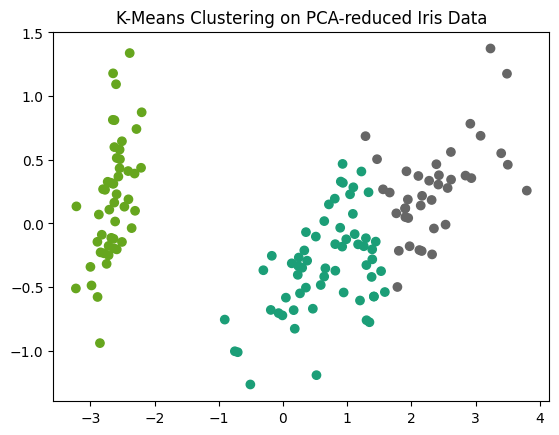

In [4]:
# Practical Question 24
# Load Iris dataset, reduce it using PCA and plot clusters formed using K-Means.
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

iris = load_iris()
X = PCA(n_components=2).fit_transform(iris.data)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Dark2')
plt.title("K-Means Clustering on PCA-reduced Iris Data")
plt.show()

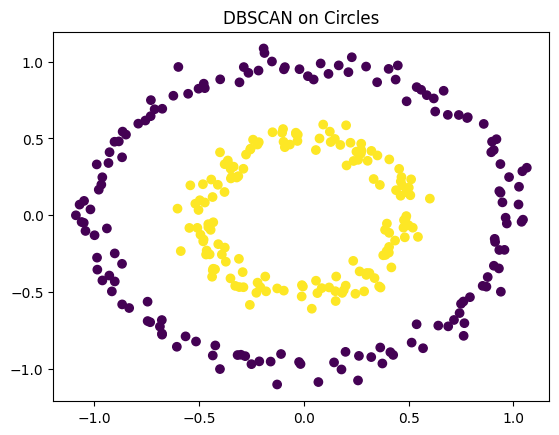

In [5]:
# Practical Question 25
# Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Circles")
plt.show()


In [6]:
# Practical Question 26
# Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print("Cluster Centroids:", kmeans.cluster_centers_)


Cluster Centroids: [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


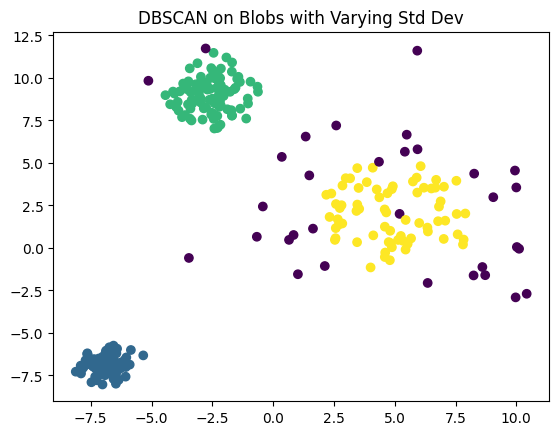

In [7]:
# Practical Question 27
# Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Blobs with Varying Std Dev")
plt.show()

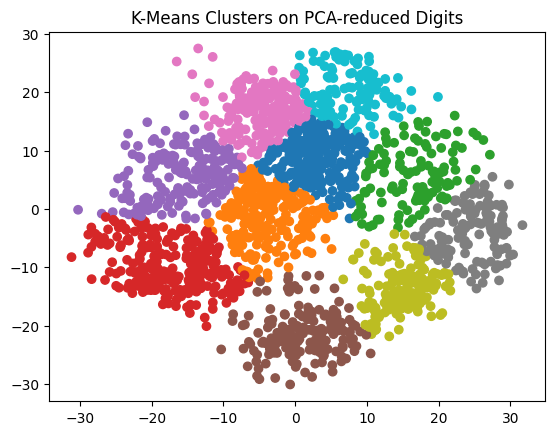

In [8]:
# Practical Question 28
# Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title("K-Means Clusters on PCA-reduced Digits")
plt.show()

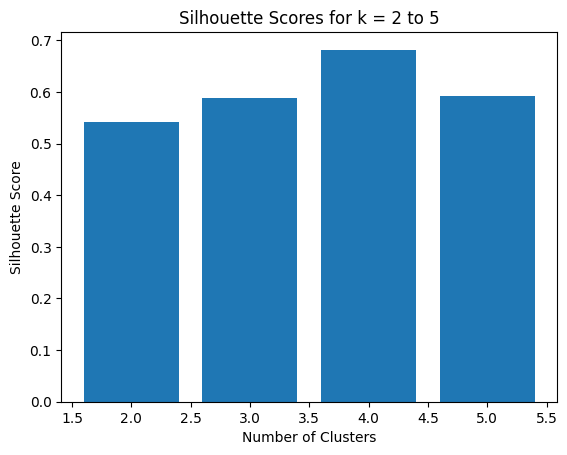

In [9]:
# Practical Question 29
# Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
from sklearn.metrics import silhouette_score

scores = []
k_values = [2, 3, 4, 5]
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))
plt.bar(k_values, scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()


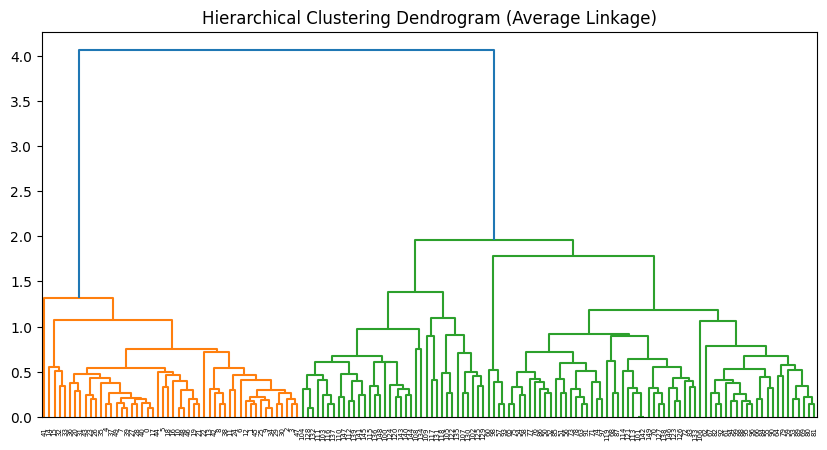

In [10]:
# Practical Question 30
# Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

X = load_iris().data
linked = linkage(X, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()

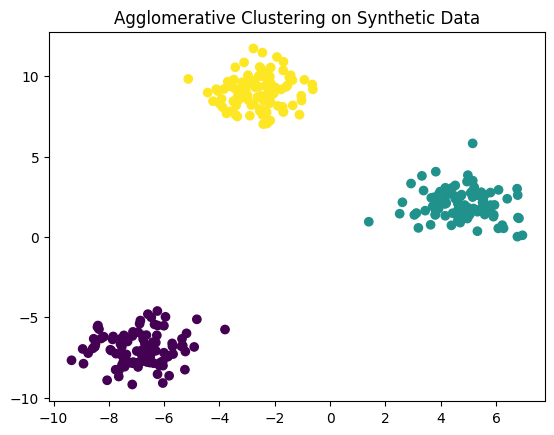

In [11]:
# Practical Question 31
# Generate synthetic data using make_blobs and apply Agglomerative Clustering. Visualize results.
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering on Synthetic Data")
plt.show()


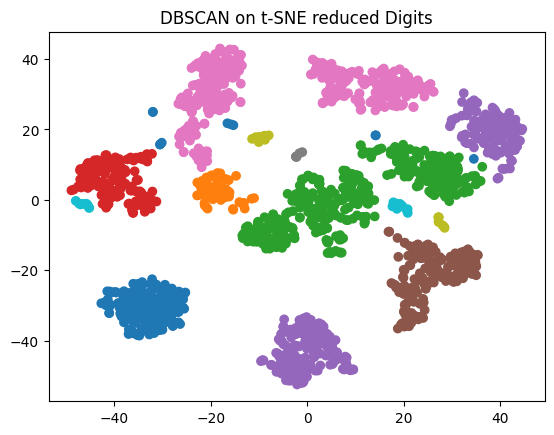

In [12]:
# Practical Question 32
# Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
dbscan = DBSCAN(eps=3, min_samples=5).fit(X_tsne)
labels = dbscan.labels_
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN on t-SNE reduced Digits")
plt.show()

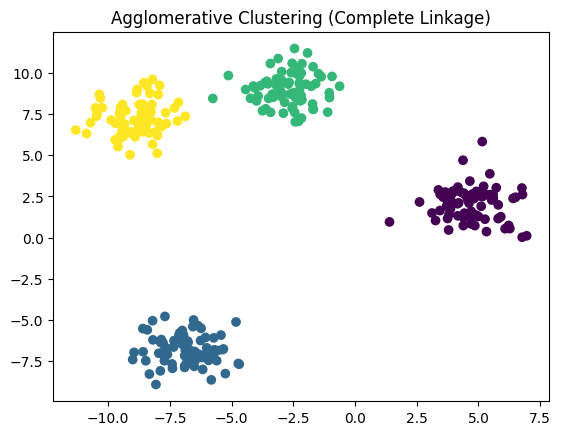

In [13]:
# Practical Question 33
# Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

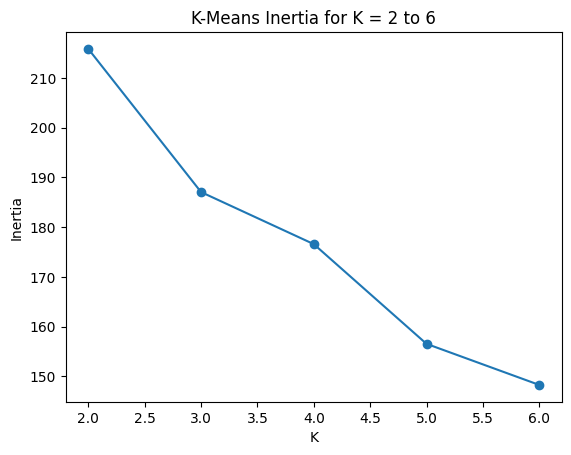

In [14]:
# Practical Question 34
# Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
X = MinMaxScaler().fit_transform(load_breast_cancer().data)
inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 7), inertias, marker='o')
plt.title("K-Means Inertia for K = 2 to 6")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

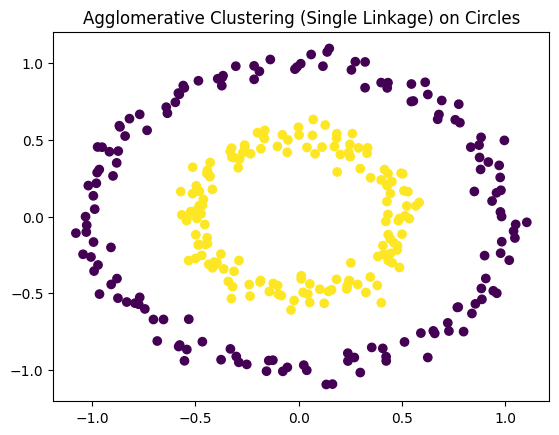

In [15]:
# Practical Question 35
# Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()

In [17]:
# Practical Question 36
# Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
from sklearn.datasets import load_wine # Import the load_wine function
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X = StandardScaler().fit_transform(load_wine().data)
labels = DBSCAN(eps=1.5, min_samples=5).fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of Clusters (excluding noise):", n_clusters)


Number of Clusters (excluding noise): 0


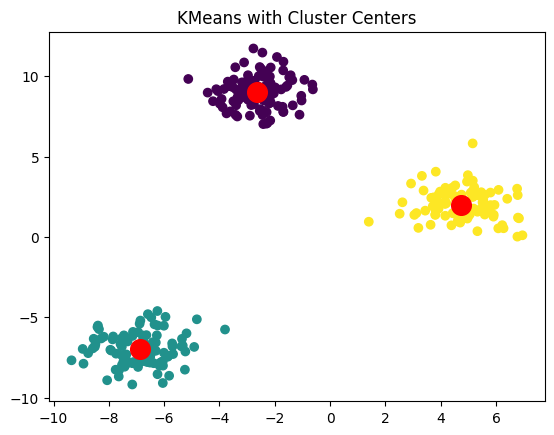

In [18]:
# Practical Question 37
# Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("KMeans with Cluster Centers")
plt.show()


In [19]:
# Practical Question 38
# Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
X = StandardScaler().fit_transform(load_iris().data)
labels = DBSCAN(eps=0.6, min_samples=5).fit_predict(X)
noise_count = list(labels).count(-1)
print("Number of Noise Points:", noise_count)


Number of Noise Points: 26


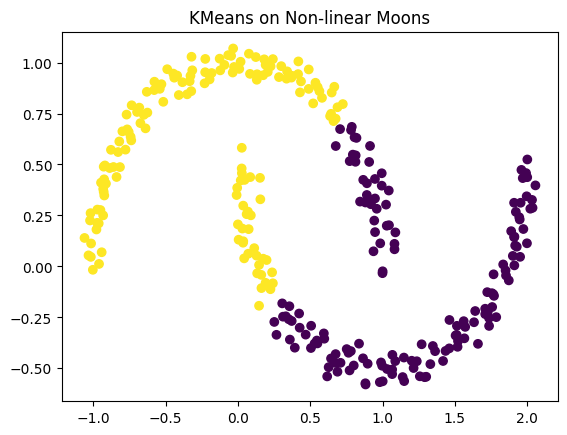

In [20]:
# Practical Question 39
# Generate synthetic non-linearly separable data using make_moons, apply KMeans, and visualize the clustering result.
X, _ = make_moons(n_samples=300, noise=0.05)
labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("KMeans on Non-linear Moons")
plt.show()

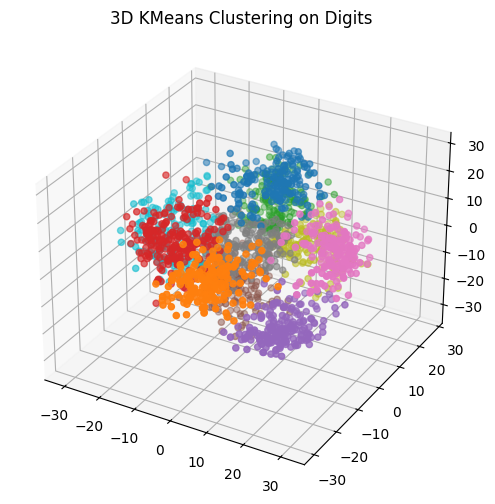

In [21]:
# Practical Question 40
# Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
from mpl_toolkits.mplot3d import Axes3D

X = PCA(n_components=3).fit_transform(load_digits().data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='tab10')
plt.title("3D KMeans Clustering on Digits")
plt.show()

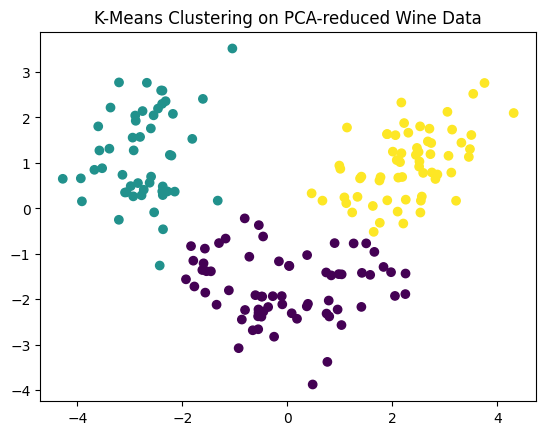

In [22]:
#Practical Question 41
# Use the Wine dataset, apply PCA to reduce the dimensions to 2, and apply K-Means. Visualize the result using a scatter plot.

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = load_wine()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering on PCA-reduced Wine Data")
plt.show()


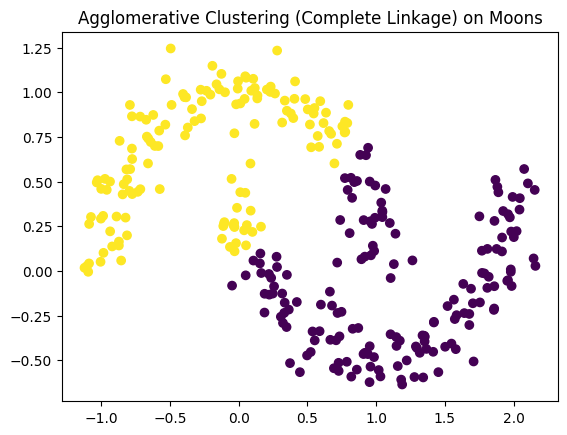

In [23]:
# Practical Question 42
# Create synthetic data using make_moons, apply Agglomerative Clustering with complete linkage, and plot the results.

from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

X, _ = make_moons(n_samples=300, noise=0.1)
agg = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage) on Moons")
plt.show()


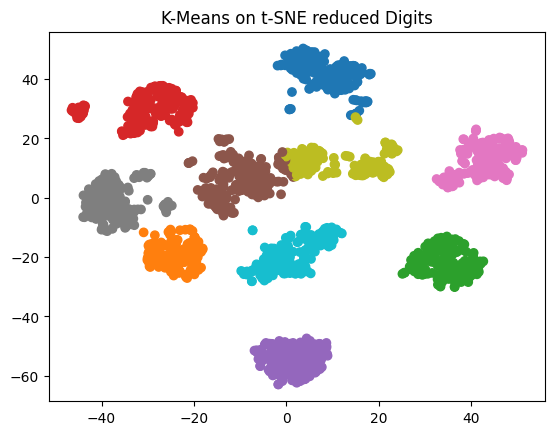

In [24]:
# Practical Question 43
# Load the Digits dataset, apply t-SNE to reduce the data to 2D, and use K-Means to cluster. Plot the results.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

X = load_digits().data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("K-Means on t-SNE reduced Digits")
plt.show()


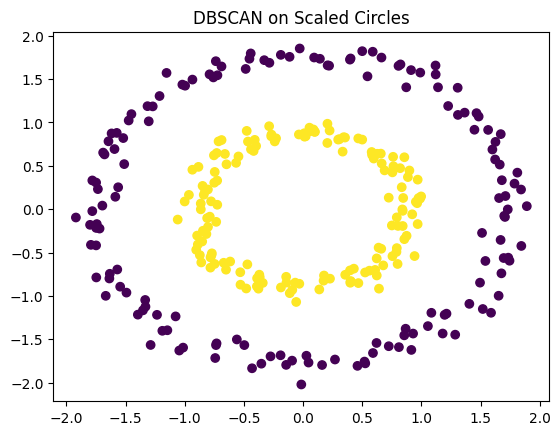

In [25]:
# Practical Question 44
# Create data with make_circles, scale it, and use DBSCAN to cluster. Plot the results.

from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.title("DBSCAN on Scaled Circles")
plt.show()

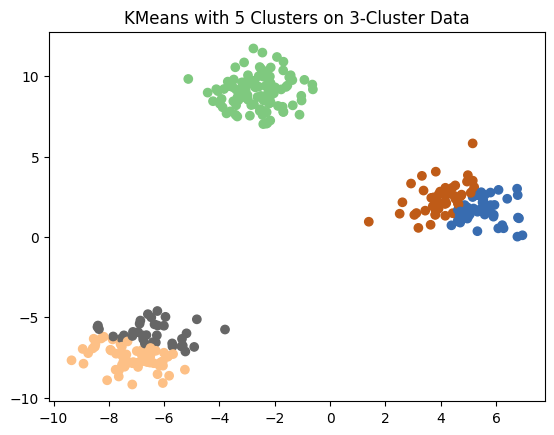

In [26]:
# Practical Question 45
# Generate data with 3 clusters using make_blobs, use KMeans with 5 clusters, and show the difference.

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("KMeans with 5 Clusters on 3-Cluster Data")
plt.show()

In [27]:
# Practical Question 46
# Load the Iris dataset, apply DBSCAN and then show how many clusters (excluding noise) were found.

X = StandardScaler().fit_transform(load_iris().data)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 2


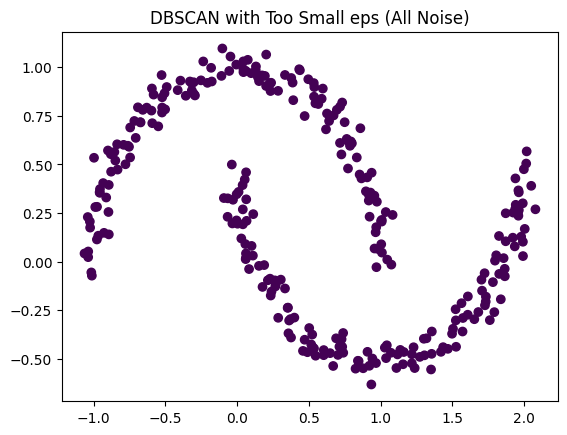

Number of Noise Points: 300


In [28]:
# Practical Question 47
# Use make_moons, apply DBSCAN with inappropriate eps to show when all points become noise.
X, _ = make_moons(n_samples=300, noise=0.05)
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN with Too Small eps (All Noise)")
plt.show()

noise_points = list(labels).count(-1)
print("Number of Noise Points:", noise_points)


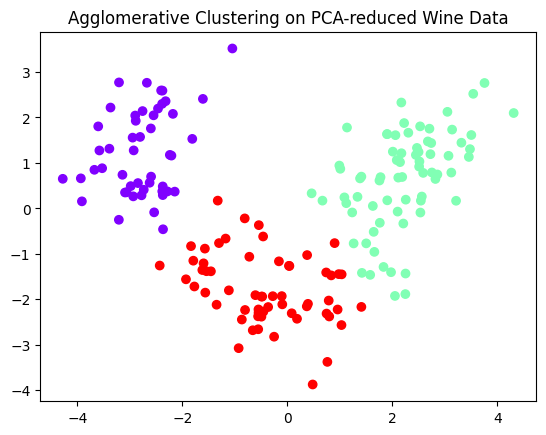

In [29]:
# Practical Question 48
# Load the Wine dataset, reduce it to 2D using PCA, and apply Agglomerative Clustering with average linkage.

X = StandardScaler().fit_transform(load_wine().data)
X_pca = PCA(n_components=2).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering on PCA-reduced Wine Data")
plt.show()
